<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-jihidalgor/blob/main/ActividadSemana8_DataAnalysisWithPython_A01794221.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TC4029 - Ciencia y analítica de datos.**

**Semana 8 - Data Analysis with Python (IBM).**

**Módulo 5 - Model Evaluation.**


Alumno: Jorge Iván Hidalgo Reyes.

*Matrícula: A01794221.*


Profesora: María de la Paz Rico Fernández.

Fecha: Noviembre 08, 2022.

En este módulo se estudió sobre:

* Evaluación del modelo.
* Sobreentrenamiento, subentrenamiento y selección del modelo.
* Regresión Ridge.
* Grid Search.

# Model Evaluation.

"In-sample evaluation" nos dice lo bien que nuestro modelo se ajusta a los datos proporcionados para entrenarlo. Por otro lado, no da una estimación de lo bien que el modelo entrenado puede predecir nuevos datos.

Una solución para este problema es dividir nuestros datos, utilizar los datos de la muestra o los datos de entrenamiento para entrenar el modelo.
El resto de los datos, llamados datos de prueba, se utilizan como datos fuera de muestra. Estos últimos se utilizan para aproximar el rendimiento del modelo en el mundo real.

Separar los datos en conjuntos de entrenamiento y de prueba es una parte importante de la evaluación del modelo. Utilizamos los datos de prueba para hacernos una idea de cómo funcionará nuestro modelo en el mundo real.
Cuando dividimos un conjunto de datos, normalmente la parte más grande de los datos se utiliza para el entrenamiento y una parte más pequeña se utiliza para las pruebas.

Una función popular en el paquete sci-kit learn para dividir conjuntos de datos es la función "train test split". Esta función divide aleatoriamente un conjunto de datos en subconjuntos de entrenamiento y de prueba.

El error de generalización es una medida de la eficacia de nuestros datos en la predicción de datos no vistos anteriormente. El error que obtenemos utilizando nuestros datos de prueba es una aproximación a este error.

Una de las métricas de evaluación "out-of-sample" más comunes es la validación cruzada. En este método, el conjunto de datos se divide en k grupos iguales; cada grupo se denomina "fold".

La forma más sencilla de aplicar la validación cruzada es llamar a la función "cross_val_score()" que realiza múltiples evaluaciones "out-of-sample".

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


**Part 1: Training and Testing.**

In [4]:
y_data = df['price']
x_data=df.drop('price',axis=1)

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 180


**Pregunta 1.**

In [6]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


In [7]:
from sklearn.linear_model import LinearRegression

lre=LinearRegression()

lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [8]:
lre.score(x_test[['horsepower']], y_test)

0.36358755750788263

In [9]:
lre.score(x_train[['horsepower']], y_train)

0.6619724197515104

**Pregunta 2.**

In [10]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.7139364665406973

*Cross-Validation Score.*


In [11]:
from sklearn.model_selection import cross_val_score

Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [12]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.291183944475603


In [13]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

**Pregunta 3.**

In [14]:
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc.mean()

0.5166761697127429

In [15]:
from sklearn.model_selection import cross_val_predict

In [16]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

# Overfitting, Underfitting and Model Selection.

El objetivo de la selección del modelo es determinar el orden del polinomio para proporcionar la mejor estimación de la función y.

Si intentamos ajustar la función con una función lineal, la línea no es lo suficientemente compleja para para ajustarse a los datos. Como resultado, hay muchos errores. Esto se denomina subentrenamiento, en el que el modelo es demasiado simple para ajustarse a los datos. Si aumentamos el orden del polinomio, el modelo se ajusta mejor, pero el modelo no es lo suficientemente flexible y presenta también un subentrenamiento.

El sobreentrenamiento se presenta cuando el modelo es demasiado flexible y se ajusta al ruido en lugar de a la función.

In [17]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [18]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [19]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [20]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [21]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


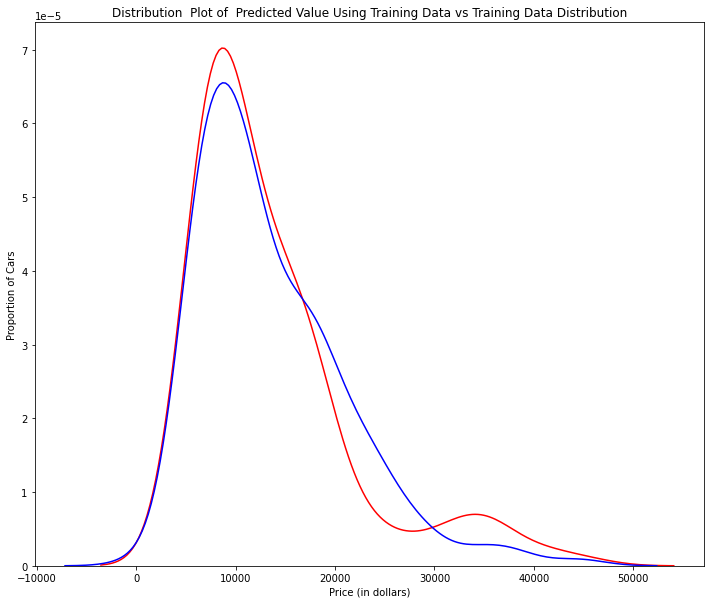

In [22]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


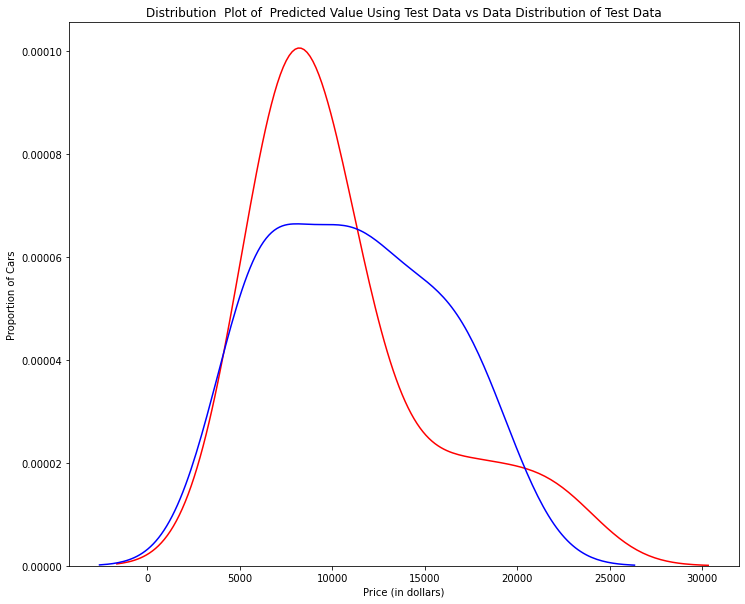

In [23]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

**Sobreentrenamiento.**

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [26]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [27]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [28]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65561887,  7307.98782321, 12213.78770965, 18893.24804015,
       19995.95195136])

In [29]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.65561887  7307.98782321 12213.78770965 18893.24804015]
True values: [ 6295. 10698. 13860. 13499.]


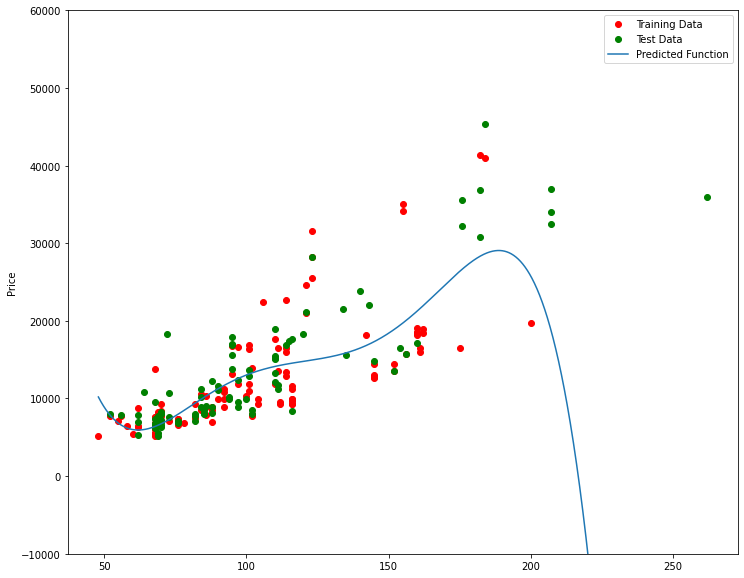

In [30]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [31]:
poly.score(x_train_pr, y_train)

0.556771690212023

In [32]:
poly.score(x_test_pr, y_test)

-29.87134030204415

Text(3, 0.75, 'Maximum R^2 ')

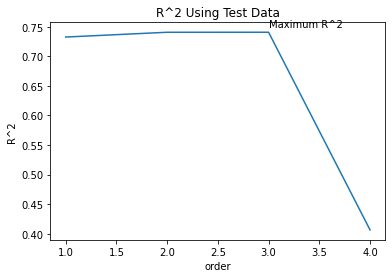

In [33]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ') 

In [34]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [35]:
from ipywidgets import interact, interactive, fixed, interact_manual
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

**Pregunta 4a.**

In [36]:
pr1=PolynomialFeatures(degree=2)

**Pregunta 4b.**

In [37]:
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

**Pregunta 4c.**

In [38]:
x_train_pr1.shape 

(110, 15)

**Pregunta 4d.**

In [39]:
poly1=LinearRegression().fit(x_train_pr1,y_train)

**Pregunta 4e.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


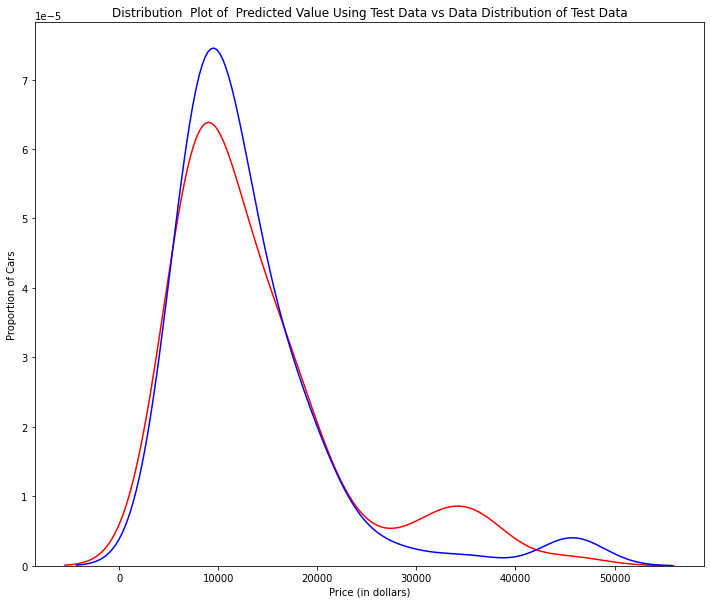

In [40]:
yhat_test1=poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

# Ridge Regression.

La regresión Ridge controla la magnitud de estos coeficientes polinómicos introduciendo el parámetro alfa (se define antes de ajustar o entrenar el modelo).

Si alfa es demasiado grande, los coeficientes se acercarán a cero y no se ajustarán a los datos. Si alfa es cero, el sobreentrenamiento es evidente. Para alfa igual a 0,001, el sobreentrenamiento comienza a disminuir.
Para alfa igual a 0,01, la función estimada sigue la función real.
Cuando alfa es igual a 1, vemos los primeros signos de subentrenamiento.

Para seleccionar alfa utilizamos la validación cruzada. Para hacer una predicción utilizando la regresión ridge, importamos la función "ridge" de la librería "sklearn linear models". Creeamos un objeto Ridge utilizando el constructor. El parámetro alpha es uno de los argumentos del constructor. Entrenamos el modelo utilizando el método fit. Para hacer una predicción, utilizamos el método predict. Para determinar el parámetro alpha, utilizamos algunos datos para el entrenamiento. Utilizamos un segundo conjunto llamado datos de validación. Empezamos con un valor pequeño de alfa, entrenamos el modelo, hacemos una predicción utilizando los datos de validación, luego calculamos la R al cuadrado y guardamos los valores. Repetimos el valor para un valor mayor de alfa. Volvemos a entrenar el modelo, hacemos una predicción utilizando los datos de validación, luego calculamos la R al cuadrado y almacenamos los valores de R al cuadrado. Repetimos el proceso para un valor diferente de alfa, entrenando el modelo y haciendo una predicción. Seleccionamos el valor de alfa que maximiza la R al cuadrado. 

*Nota: se puede utilizar otras métricas para seleccionar el valor de alfa, como lo es el error medio al cuadrado.*

In [41]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [42]:
from sklearn.linear_model import Ridge

In [43]:
RigeModel=Ridge(alpha=1)

In [44]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [45]:
yhat = RigeModel.predict(x_test_pr)

In [46]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.2489147  20949.92322737 19403.60313256]
test set : [ 6295. 10698. 13860. 13499.]


In [47]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:08<00:00, 113.32it/s, Test Score=0.564, Train Score=0.859]


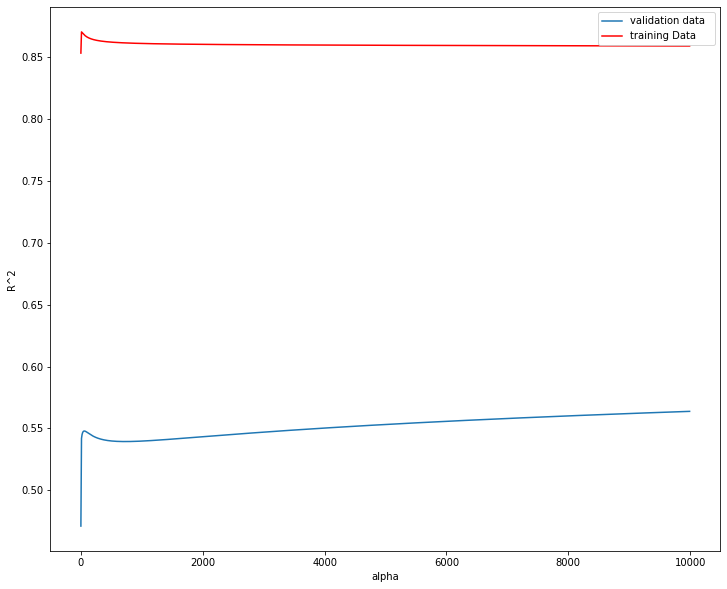

In [48]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

**Pregunta 5.**

In [49]:
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5418576440206702

# Grid Search.

Scikit-learn tiene un medio para iterar automáticamente sobre estos hiperparámetros usando validación cruzada. Este método se denomina búsqueda en "Grid Search". Esta función toma el modelo u objetos que se desea entrenar y diferentes valores de los hiperparámetros. A continuación, calcula el error cuadrático medio o R al cuadrado para varios valores de hiperparámetros, lo que le permite elegir los mejores valores.

Una de las ventajas de "Grid Search" es la rapidez con la que podemos probar múltiples parámetros.

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [52]:
RR=Ridge()
RR

Ridge()

In [53]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [54]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [55]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [56]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151

# **Graded Review Questions.**

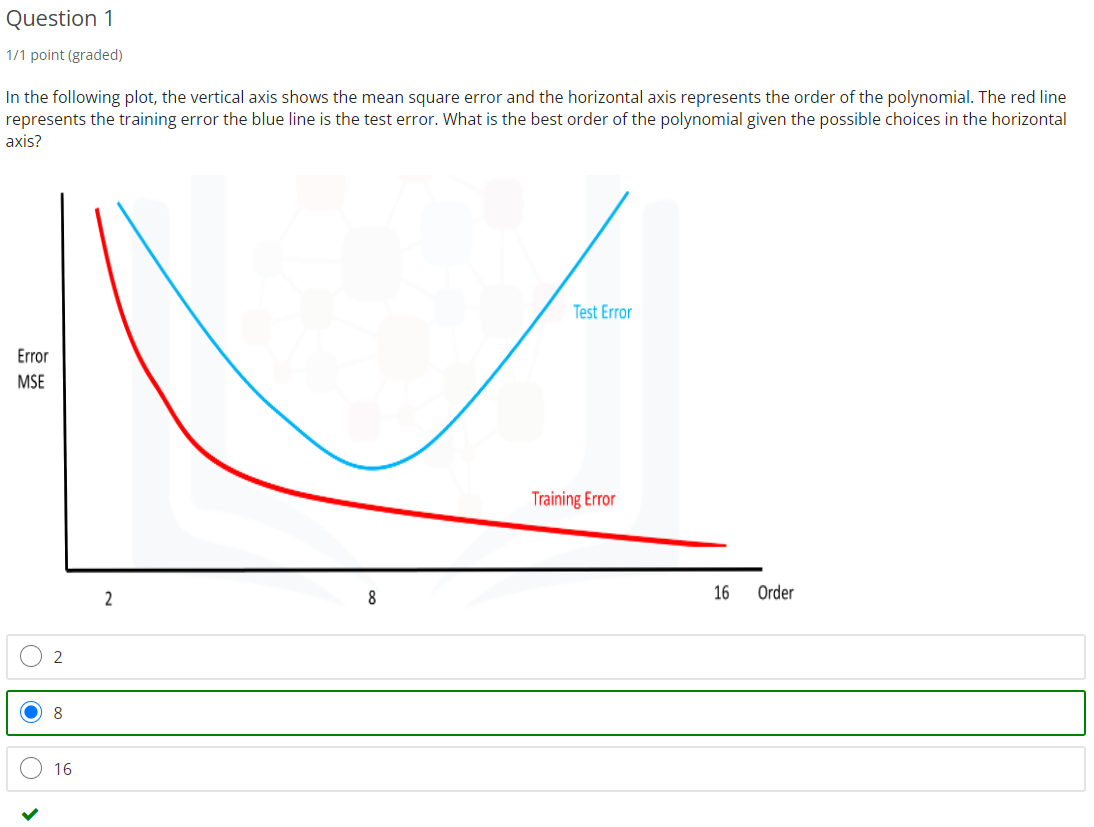

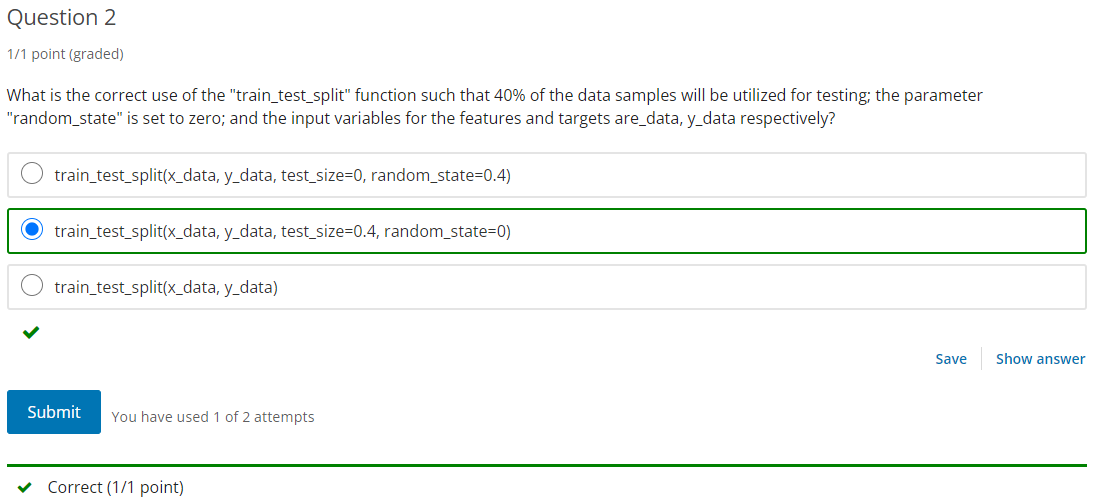

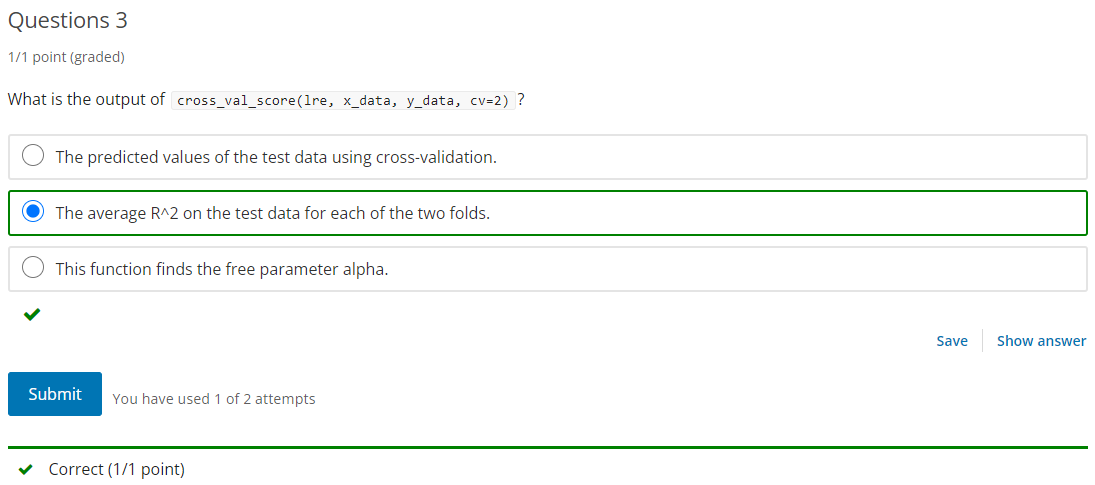

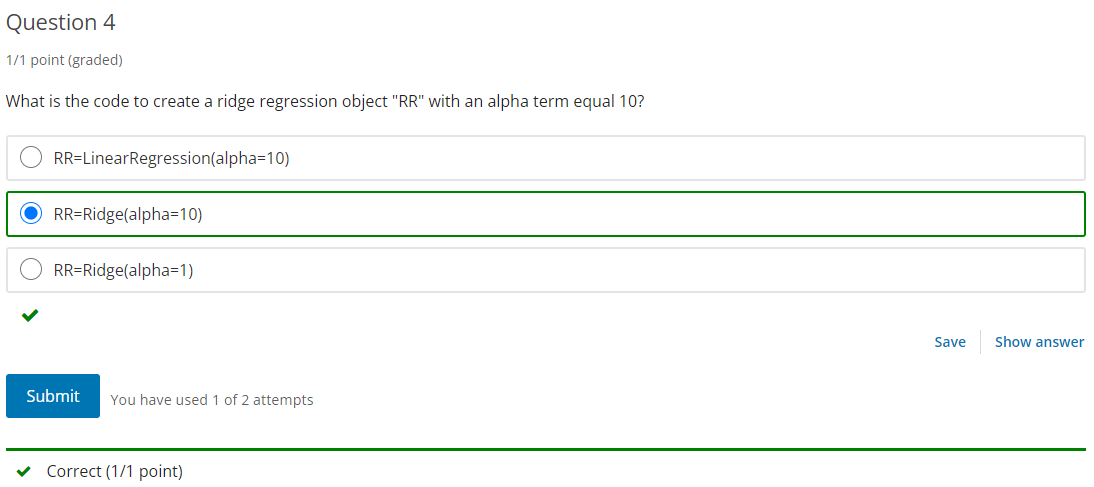

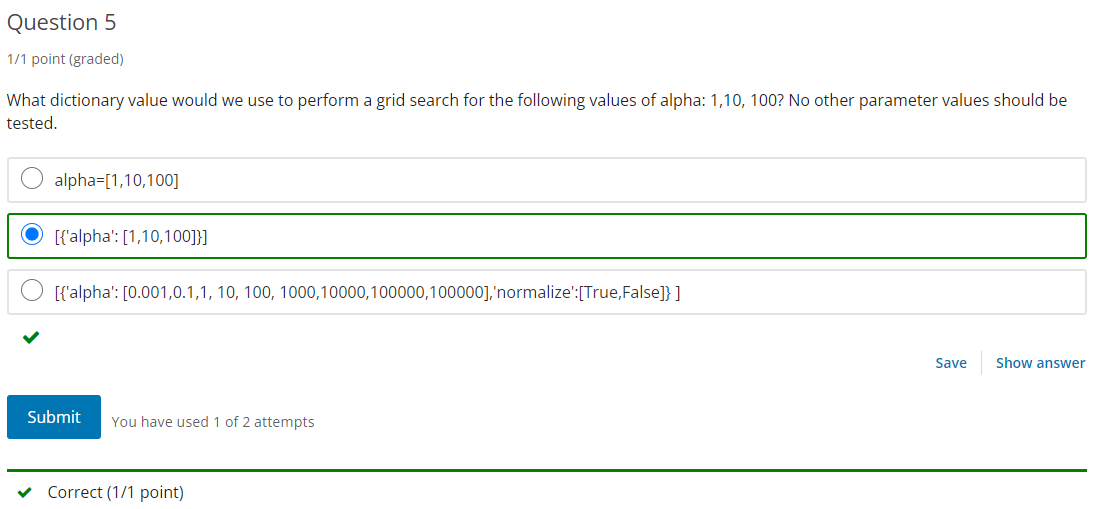

# Progreso en el curso.

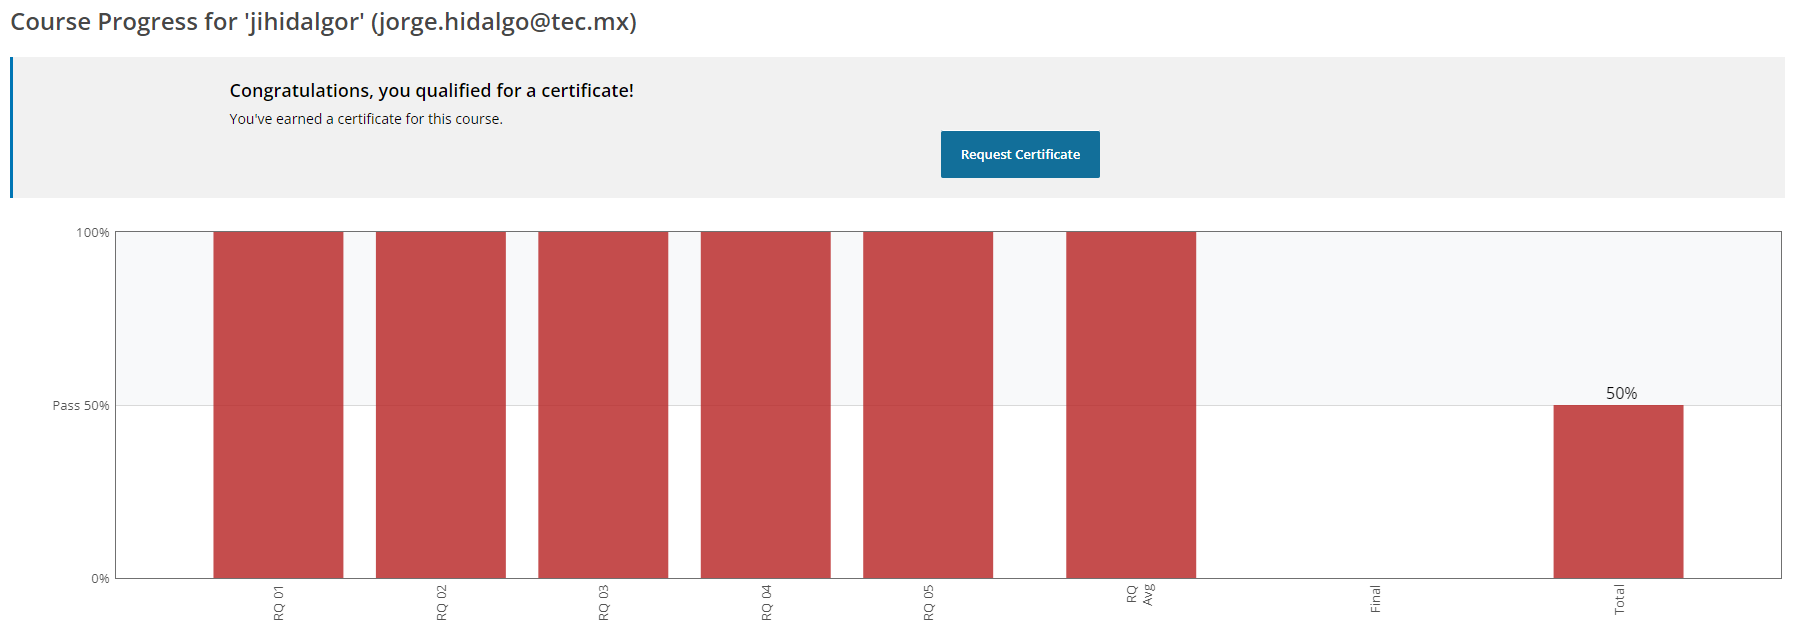